# Geçmişten Günümüze Super Çözünürlük

Süper çözünürlüklü görüntüleme ( SR ), bir görüntüleme sisteminin çözünürlüğünü artıran (artıran) bir teknikler sınıfıdır. 
Kullanım amacına göre bulanıklığı,resmin kalitesi ve dokularına çeşitli müdaheler ile resmi restore etme iyileştirme hedeflenmektedir. Geçmişten günümüze pek çok yöntem geliştirildi ve hepsini ele alacağız. En son örnekleri olan  ESRGAN'ı özellikle  anlatıp kullanacağız.

Ama ilk olarak Bilinear Interpolation ile başlayalım.

##  Bilinear Interpolation 

Yapmış olduğu işlevi size tek bir satırda anlatmam istenseydi o da şu satır olurdu.

"
from PIL import Image

Image.BILLINEAR
"

Gerçektende yaptığı tam olarak budur.
Çalışma mantıkları ise ızgara kullanmak üzerine. Bilinear kullanıyorsanız resminizin üzerine 2 adet düz ızgara konmakta ve çeşitli işlemlere tabii olmaktadır. Aynı şey Bicubic içinde geçerlidir. Aşağıdaki linkten dayha detaylı sonuçlara ulaşabilirsiniz.

https://en.wikipedia.org/wiki/Bilinear_interpolation#:~:text=In%20mathematics%2C%20bilinear%20interpolation%20is,again%20in%20the%20other%20direction.

Bilinear ve Bicubic algoritmaları deyim yerindeyse bu alanın öncüleri oldular. Ama tabiki yeterli gelmeyecekti. 

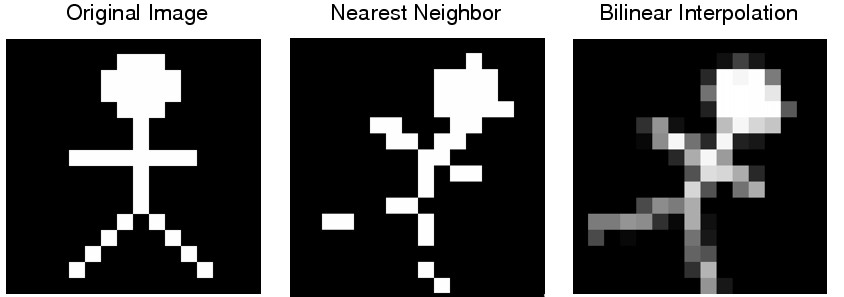

Bilgi teorisinde veri işleme eşitsizliği denen bir kavram var. Verileri istediğiniz şekilde işleyin halihazırda olan bilgileri ekleyemeyeceğinizi söyler. Eksik verilerin ise daha sonraki işlemlerde kurtarılamayacağını belirlitir. Bu da süper çözünürlüğün imkansız olduğu anlamına gelir. Peki sizce de öyle mi? Ne dersiniz?
İşin içine Neural Network girene kadar evet. Derin öğrenme herşeyi değiştirmeye devam ediyor...


Önceden eğitilmiş bir neural network bu ilkeyi ihlal etmeden veri ekleme yapabilir.

Kısaca buradaki asıl amaç Düşük ve yüksek çözünürlüklü görüntüler arasında eşleştirme için neural network eğitmekten söz ediyoruz.
## Verisetleri ve Loss:
Bu alanda ilk veri setleri ise yüksek çözünürlük görüntüleri toplayıp onları küçülterek oluşturuldu. Daha sonra ise inputu bu düşük çözünürlüklü olan CNN'ler oluşturuldu. Ve asıl görüntüler ile eşleşmesini sağlamak için eğitildi.

Buradaki minimize değeri (mse loss):
    E = (Output-Ground Truth)**2 oldu
    
Ama MSE formülünün ne kadar uygun olduğu uzun zamandır tartışılmakta. Ama asıl konu ise insanın resim algısını nasıl betimleyebiliriz? Tüm bu tartışmaları "Mean Squared Error: Love it ? or Leave it?" diye aratarak erişebilirsiniz.

Son bir ayrıntı olarak önce görüntü bozulmalarınının ciddiyetini ölçmek için geliştirildiyse de daha sonraları araştırmacılar bunu şuanki hali olan mse loss gibi kullandılar.

# CNN ile Super Çözünürlük

Bu alanın öncüsü çok klasik bir isme sahip olan Super Resolution CNN (SRCNN)'dir. Makaleye şuradaki linkten ulaşabilirsiniz.
Daha sonrası ise Fast Super Resolution CNN (FSRCNN) ortaya çıktı.

https://www.researchgate.net/publication/338851324_Image_Super-Resolution_Based_on_CNN_Using_Multilabel_Gene_Expression_Programming


Dong, ilk olarak görüntü süper çözünürlüğünün yeniden yapılandırılması için evrişimli bir sinir ağının kullanımını öneriyor. Bir LR görüntüsü önce Bikübik kullanılarak hedef boyuta genişletildi
enterpolasyon ve ardından doğrusal olmayan haritalama, üç katmanlı bir evrişimli
ağdan geçirelerek öznitelik haritası çıkarlıyor. Ve elimizde SR işlemincen geçmiş bir output oluyor.

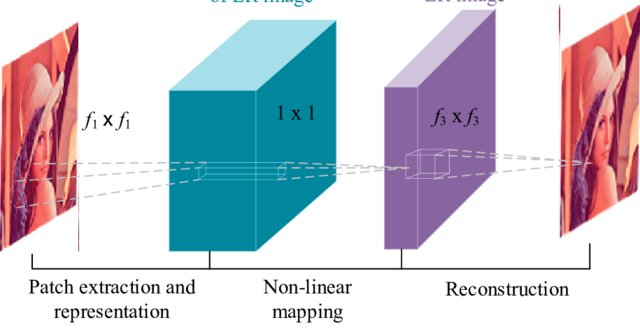

Çoklu sınıflandırma gerektiren durumlarda ise bu mimariyi kullandılar
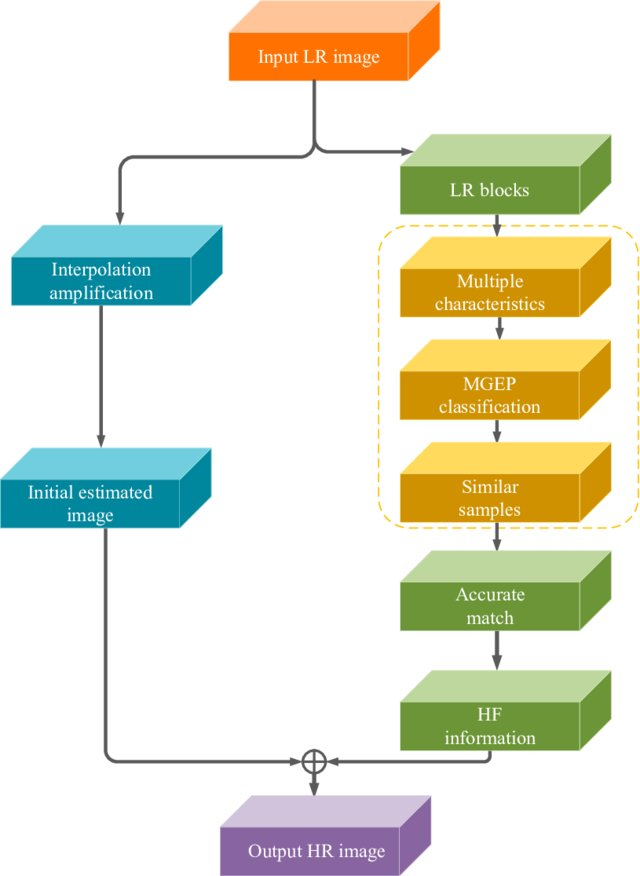

Sonra dediler ki "Biz bunu neden SRCNN ile birleştirmiyoruz?"
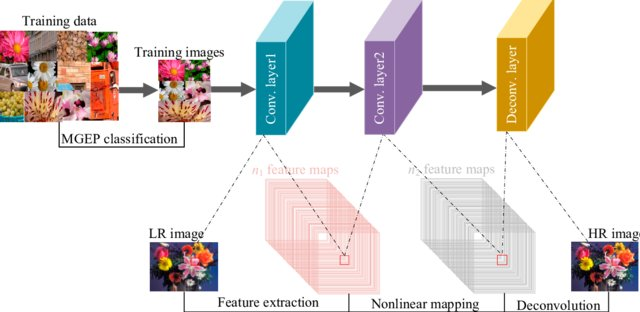

Bu ve bunun gibi pek çok model geliştirdiler ve hepsi aşağıda ki gibi metricleri ile değerlendirildi. (2X upscale için)

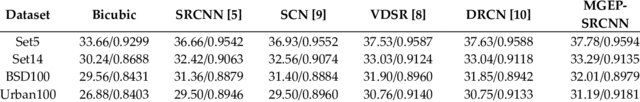

# GANs Devrimi:

CNN ile iyi sonuçlar alsalarda tatmin olmayan araştırmacılar GANs kullanmak istediler.

Makale ise şudur:
https://arxiv.org/pdf/1609.04802.pdf

## GANs nedir?

GANs, küçüklüğümüzün oyunu hırsız polis oynayan 2 neural network olarak betimlenebilir. GANs yapay sinir ağları sınıflandırma, tahmin etme ve problem çözme konularında son derece başarılı ve makine öğrenimi alanında son dönemlerdeki en heyecan verici gelişmelerden biri. Ian Goodfellow tarafından 2014 yılında geliştirildi.

GANs’i oluşturan iki ana yapı var. Bunlar:

Generator (Üretici)
Discriminator (Ayırt Edici)

Generator ve discriminator sürekli birbiri ile bağlantı içerisinde çalışırlar.Generator bir resim üretir, discriminator ise generator’un ürettiği resmin gerçek mi yoksa sahte mi olduğunu belirler.


## Konuya dönersek...

Bizim konumuzda ise Generator yğksek çözünürlüklü resimler üretmemizi sağlayacak. Ve Discriminator ise onun sınavdan geçip geçemeyeceğini belirler. Böylece oldukça güzel görüntüler elde edilir.

## SRGAN 

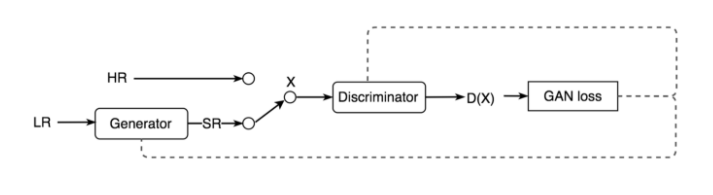

Yukarıda ki Gördüğünüz mimari SR için genel GAN mimarisi. LR, düşük çözünürlük demek iken HR, yüksek çözünürlük anlamına gelmekte.

SRGAN mimarisi içinse aşağıdaki mimari kullanıldı.

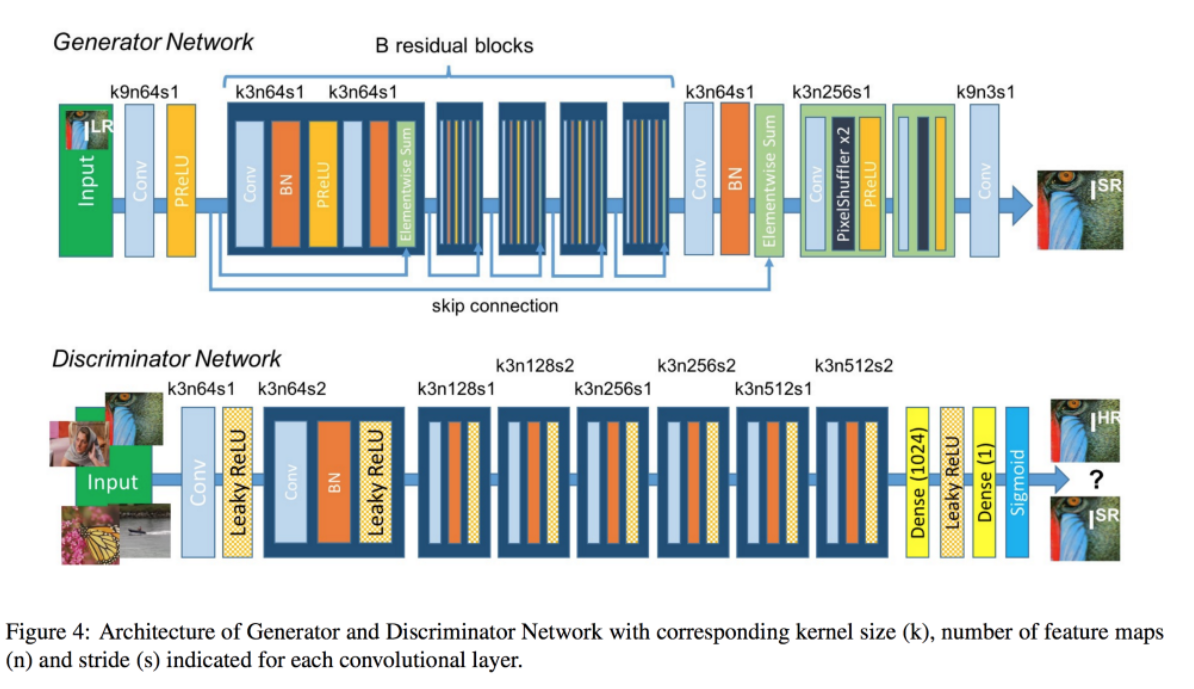

K = kernel size
n = number of feature maps
s = indicated for each conv layer


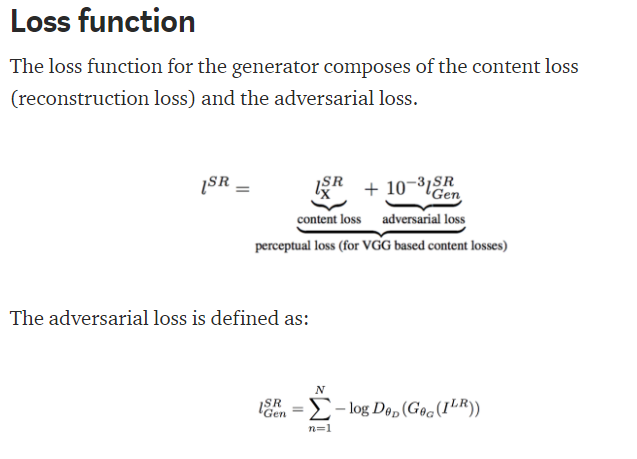

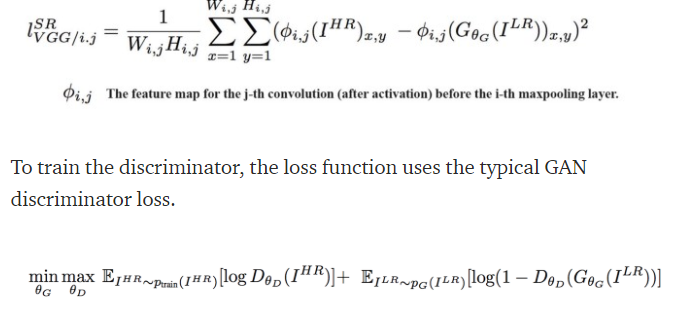

https://medium.com/@jonathan_hui/gan-super-resolution-gan-srgan-b471da7270ec


HR ve SR görüntüleri arasındaki ortalama kare hatasını (MSE) kullanarak içerik kaybını piksel bazında hesaplayabiliriz. Bununla birlikte, mesafeyi matematiksel olarak belirlerken, mutlaka bir insana daha estetik gelmeyebilir. SRGAN, bir VGG-19 ağı tarafından çıkarılan özelliklerin MSE'sini ölçen bir perceptual loss (algısal kayıp) kullanır. VGG-19 içindeki belirli bir katman için, özelliklerinin eşleştirilmesini istiyoruz (özellikler için minimum MSE).

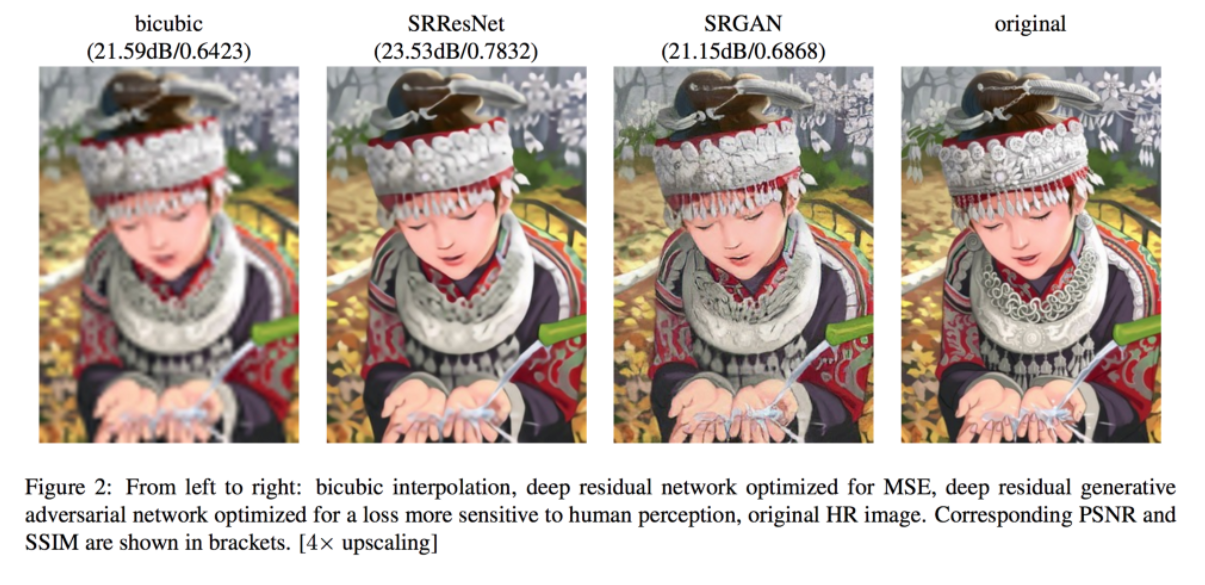

Görüldüğü üzere ResNet'de atlamalı yapısından ötürü kullanılabiliyor ama çokda başarılı olamyor maalesef (SRGAN'a göre).



# ESRGAN
Kelime olarak Enhanced SRGAN anlamına geliyor. Bir nevi Geliştirilmiş SRGAN algoritması. Birkaç hafta öncesine kadar en gelişmişi bu algoritmaydı.

ESRGAN'ın sunduğu bazı değişiklikler ise şöyle:

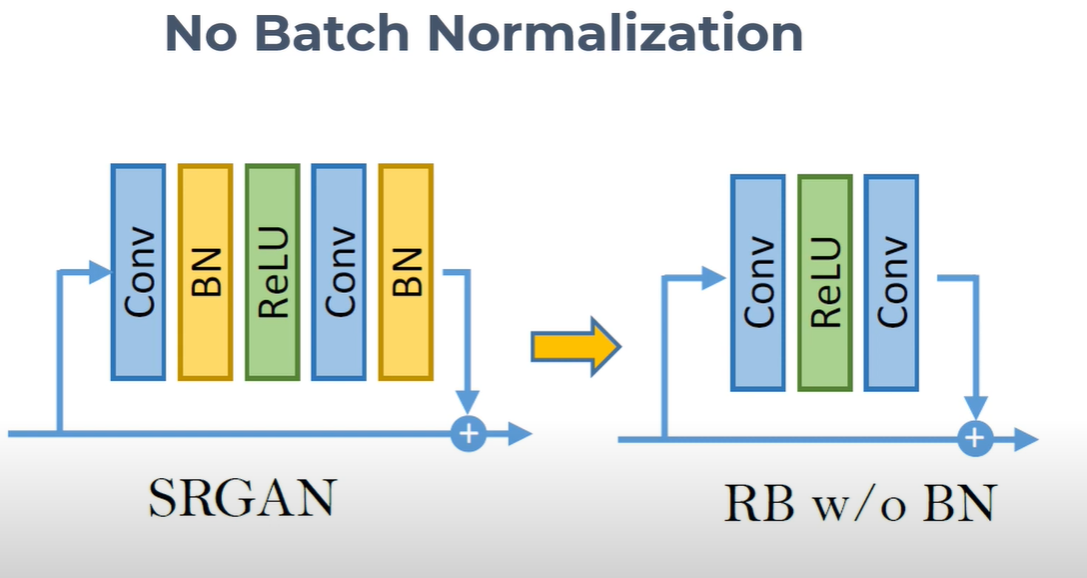

Batch Normalizition Kaldırıldı.

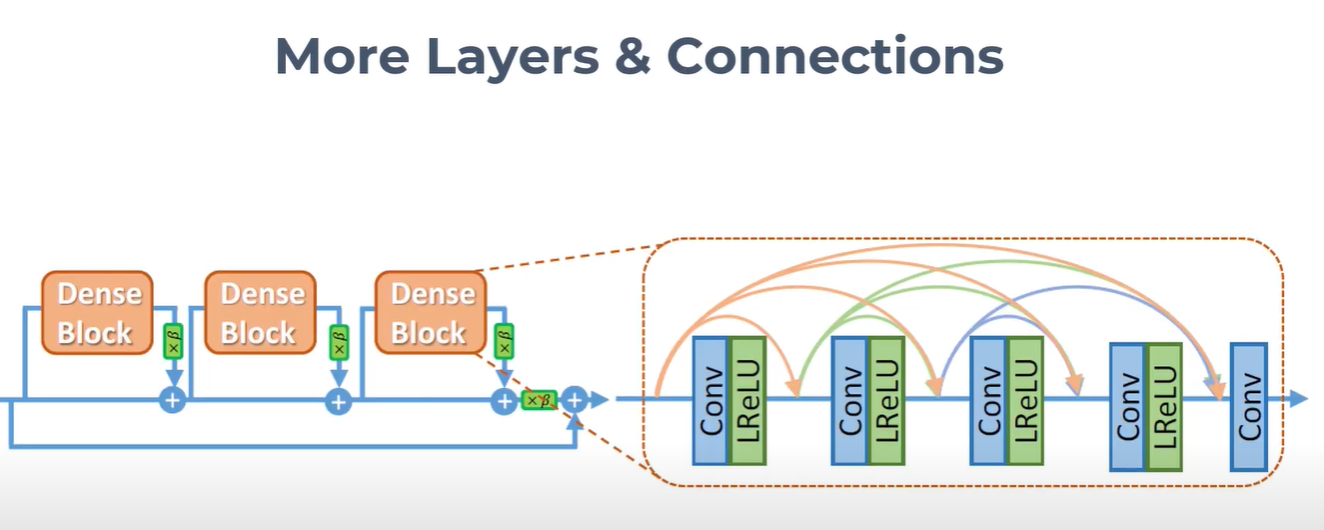

Daha fazla katman ve bağlant eklendi.

Batch Normalizition kullanmadan böylesine bir ağı eğitmek sıkıntı çıkarır. Ama "Residual Scaling" ile bu açığı kapattıklarını açıkladılar. Ve bazı "hileler" kullandıklarını söylediler onada sonra değineceğim.

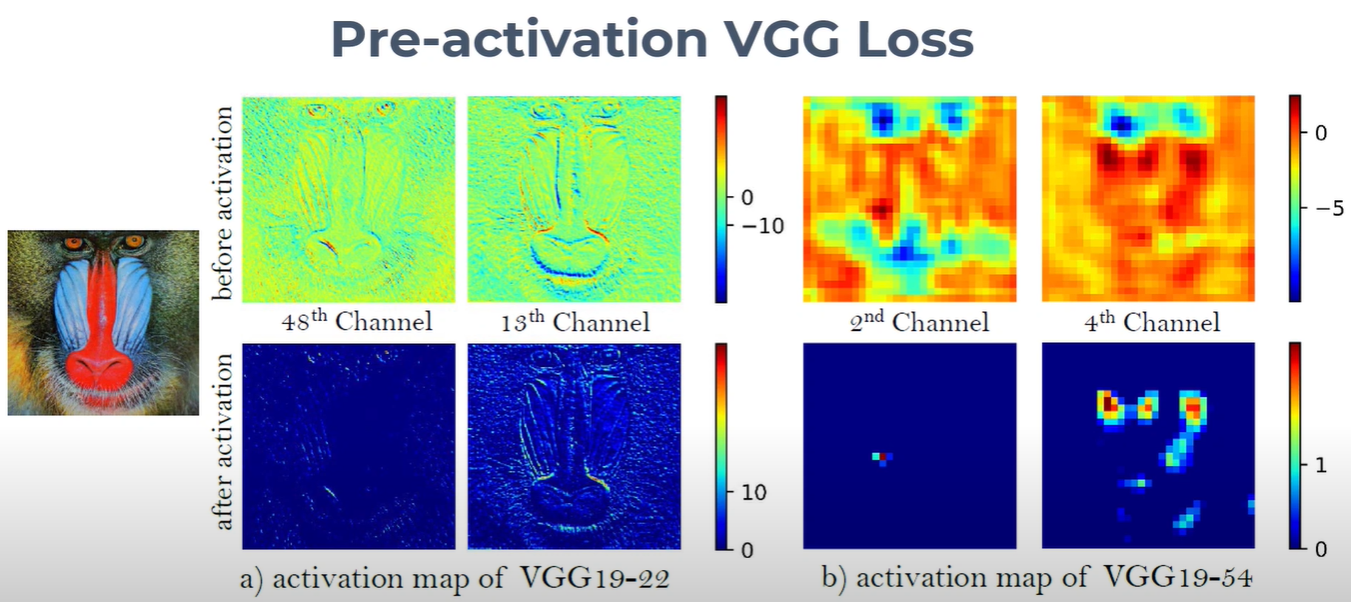

Model mimarisinde ki kayıp fonksiyonları değiştirildi. Daha önceden kullanılan öznitelik, feature map kısmı ile ilgilenen VGG loss değerini değiştirdiler. Böylece daha yoğun ve daha bilgi içeren feature map haritaları elde ettiler.


SRGAN'da aşağıdaki gibi bir yapı varken
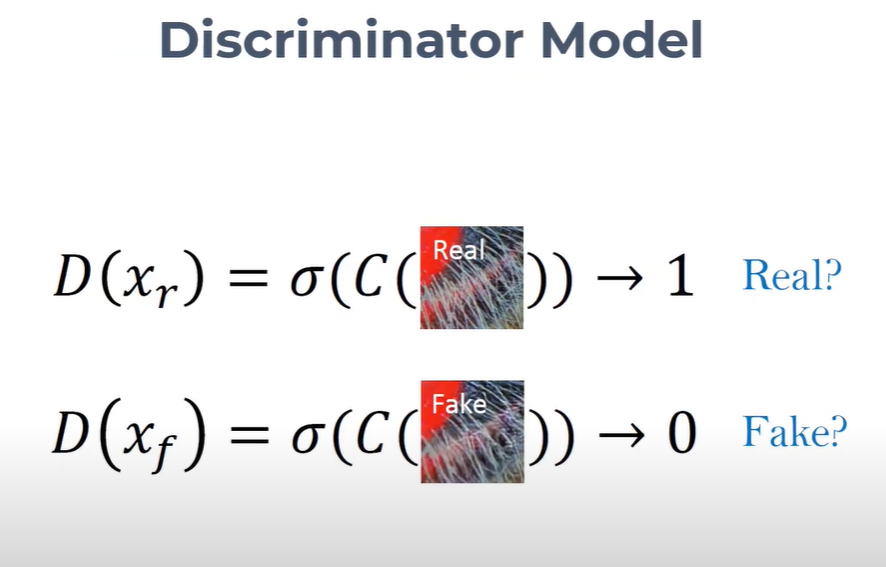


ESRGAN'da yapı şöyle

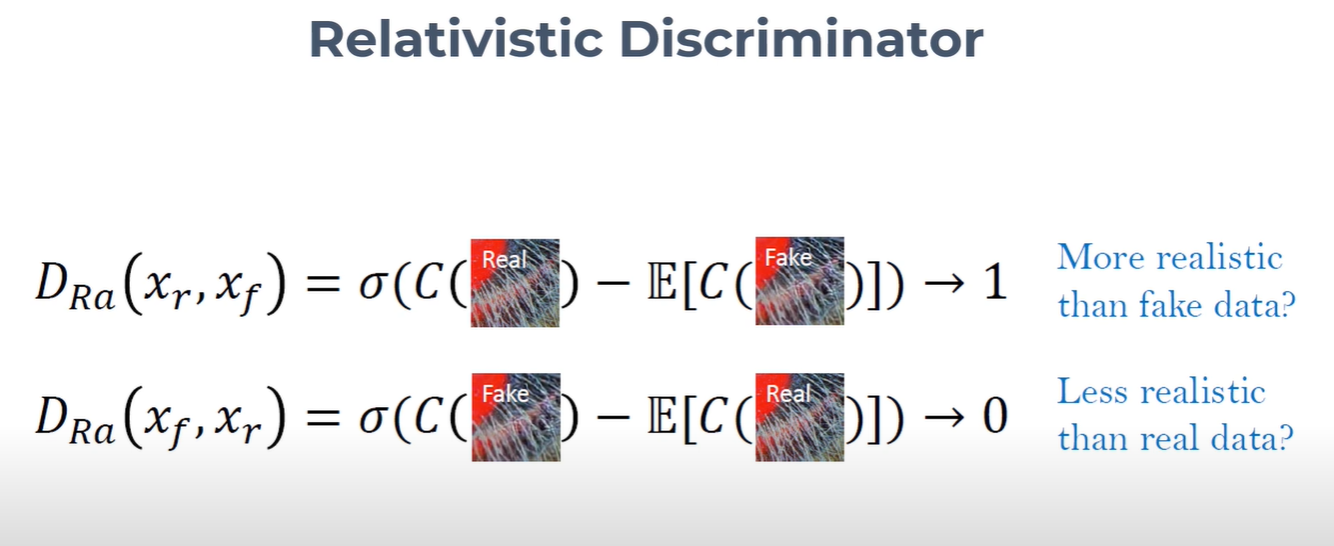


Daha sonraki tartışmalarda ise GAN temelli bir yol mu yoksa MSE temelli bir yol mu izlenmeli tartışması başladı.

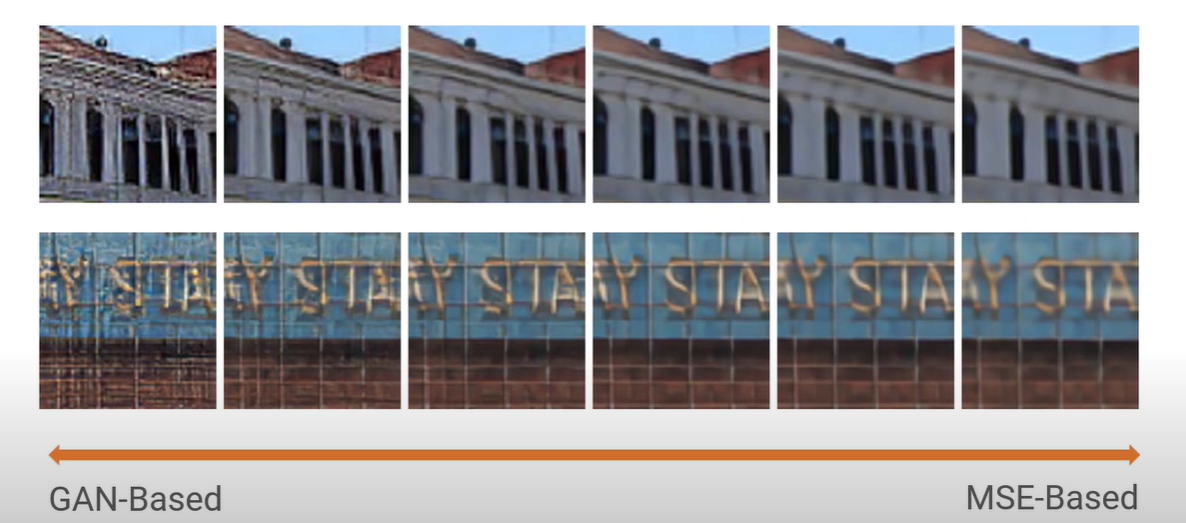


ESRGAN Modeller arası interpolasyon yaparak orta noktayı hedefliyor.


interpolasyon : En basit tanımı ile "varolan sayısal değerleri kullanarak, boş noktalardaki değerlerin tahmin edilmesi" olarak açıklanmaktadır.Türkçede bazen kolaylık olsun diye "interpolasyon" sözcüğü yerine yalnızca "tahmin" de kullanılmaktadır.

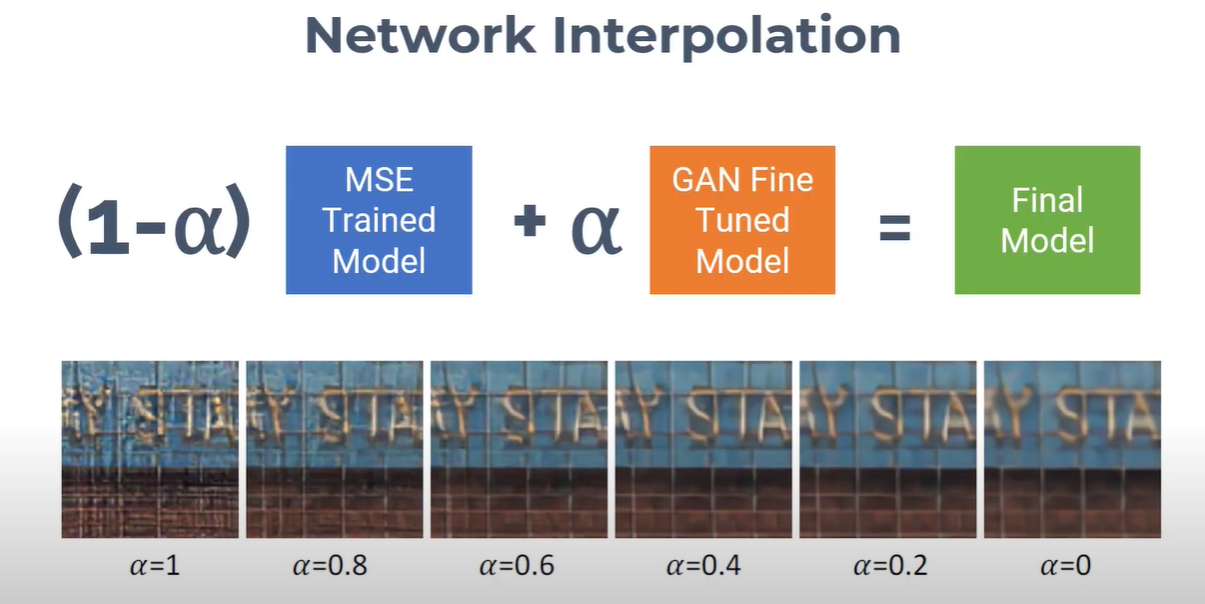

ESRGAN yukarıda ki MSE ve GAN fine tuned modelin ağırlıklı ortalamasını kullanarak en son modeli oluşturmakta.

## ESRGAN'ın verdiği sınav 

ESRGAN PIRM2018-SR yarışmasında Birinciliği kazandı. Bu, 2018 ECCVW'de (ECCV Workshop) 300'den fazla alıntı içeren bir bildiridir.

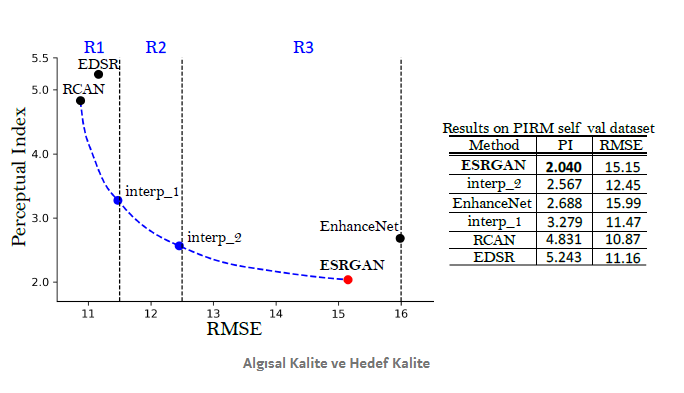



Algısal İndeks (PI), algısal kalitenin bir ölçüsüdür. Daha yüksek PI, daha düşük algısal kalite. Algısal kalite, insan gözüne çok yakın bir niteliktir.


Ayrıca ESRGAN kısmı daha fazla uzamasın diye ESRGAN  özetini burada bitiriyorum. Ana asıl makaleden ve buradan da daha çeşitli ve farklı şeyler öğrenebilirsiniz.

https://medium.com/towards-artificial-intelligence/reading-esrgan-enhanced-super-resolution-generative-adversarial-networks-super-resolution-e8533ad006b5

## Bu teknolojiler ile yapılan bazı uygulamalar ve makaleler

Google'ın, Süper Res Zoom
Zoom to learn, learn to zoom
Bulanık görüntülerden hiç olmamış yüzleri oluşturabilmek
NVİDİA'nın DLLs teknolojisine benzer uygulamalar
Bazı güvenlik sektörü ile ilgili uygulamalar
Ve bu teknolojinin son örneği TECOGAN


## ESRGAN Win Kurulumu

Öncelikle ESRGAN'ı indirin ve istediğiniz yere koyun. Daha sonra Model Base'ye gidin ve sizin için gerekli olan modeli indirin.

Onu ESRGAN içindeki Models klasörüne atın ve bitti.

Kullanmak içinse,

Düşük çözünürlüklü görüntülerinizi LR klasörüne atın

Burası sizin path olmalı\ESRGANs\ESRGAN-master pathine gelin ve cmd yi burada açın 

python test.py models/Model_ismi.pth yazın. Ve keyfinize bakın.

Başlangıç olarak Manga109Attempt.pth indirmenizi öneriyoruz.

https://github.com/xinntao/ESRGAN

https://www.youtube.com/watch?v=S487S0FQm0w&ab_channel=AhabbscienceStudio

https://upscale.wiki/wiki/Model_Database



## TECOGAN

Tecogan bu yazıyı yazdığım tarihten aşağı yukarı 7-10 gün önce paylaşılmış taze bir algoritma. Aşağıda Tecogan ile bağlantılı 
birkaç link bıkratım bakmanızı öneririm.


https://www.researchgate.net/publication/329181690_Temporally_Coherent_GANs_for_Video_Super-Resolution_TecoGAN

https://github.com/thunil/TecoGAN

https://www.youtube.com/watch?v=MwCgvYtOLS0&t=116s&ab_channel=TwoMinutePapers

Ve bu video, videolarınızı tecogan ile nasıl daha iyi hale getirebiliceğinizi anlatıyor

https://www.youtube.com/watch?v=zC0fiWnO2P4&ab_channel=AhabbscienceStudio

## Süper Çözünürlük Konusunu Kodlayarak deneyimlemek istiyorum diyenler için

http://krasserm.github.io/2019/09/04/super-resolution/


## Yararlandığım  Tüm Kaynaklar ve Göz Atmanızı Önerdiğim Kaynaklar


https://en.wikipedia.org/wiki/Bilinear_interpolation#:~:text=In%20mathematics%2C%20bilinear%20interpolation%20is,again%20in%20the%20other%20direction.

https://www.researchgate.net/publication/338851324_Image_Super-Resolution_Based_on_CNN_Using_Multilabel_Gene_Expression_Programming

https://arxiv.org/pdf/1609.04802.pdf

https://medium.com/@jonathan_hui/gan-super-resolution-gan-srgan-b471da7270ec

https://medium.com/towards-artificial-intelligence/reading-esrgan-enhanced-super-resolution-generative-adversarial-networks-super-resolution-e8533ad006b5

https://github.com/xinntao/ESRGAN

https://www.youtube.com/watch?v=S487S0FQm0w&ab_channel=AhabbscienceStudio

https://upscale.wiki/wiki/Model_Database

https://www.youtube.com/watch?v=KULkSwLk62I&ab_channel=LeoIsikdogan

https://www.researchgate.net/publication/329181690_Temporally_Coherent_GANs_for_Video_Super-Resolution_TecoGAN

https://github.com/thunil/TecoGAN

https://www.youtube.com/watch?v=MwCgvYtOLS0&t=116s&ab_channel=TwoMinutePapers

https://www.youtube.com/watch?v=zC0fiWnO2P4&ab_channel=AhabbscienceStudio

http://krasserm.github.io/2019/09/04/super-resolution/

# Bitiş 

Sunum burda bitiyor zaman ayırdığınız için müteşekkirim. Umarım birşeyler anlatabilmişimdir. İyi akşamlar dilerim.